C-SCAN Disk Scheduling Simulation


Enter the request array (space-separated integers):  66 67 98 122 124 183 199 0 14 37
Enter the initial head position:  L


Invalid input. Please enter an integer for the head position.


Enter the initial head position:  53
Enter the direction (L/R):  L


Seek Sequence: [37, 14, 0, 0, 66, 67, 98, 122, 124, 183, 199, 199]
Seek Operations: 16 + 23 + 14 + 0 + 66 + 1 + 31 + 24 + 2 + 59 + 16 + 0
Total Seek Count: 252


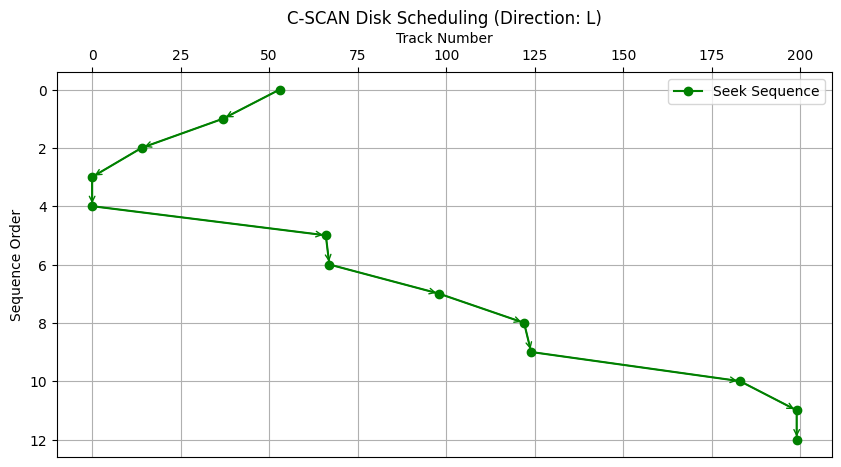

In [3]:
import matplotlib.pyplot as plt

class IO_CSCAN:
    def __init__(self, requests, head, direction):
        self.requests = requests + [0, 199]  # Adding disk boundaries
        self.head = head
        self.direction = direction.upper()
        self.seek_sequence = []
        self.total_seek_count = 0

        # Process requests based on direction
        if self.direction == "R":
            self.seek_sequence = sorted([r for r in self.requests if r >= head]) + sorted([r for r in self.requests if r < head])
        elif self.direction == "L":
            self.seek_sequence = sorted([r for r in self.requests if r < head], reverse=True) + sorted([r for r in self.requests if r >= head])
        else:
            raise ValueError("Direction must be 'L' or 'R'.")

    def calculate_seek_operations(self):
        current_position = self.head
        seek_operations = []

        # Calculate total seek operations
        for track in self.seek_sequence:
            distance = abs(track - current_position)
            seek_operations.append(distance)
            current_position = track

        self.total_seek_count = sum(seek_operations)

        # Print seek operations
        print("Seek Sequence:", self.seek_sequence)
        print("Seek Operations:", " + ".join(map(str, seek_operations)))
        print("Total Seek Count:", self.total_seek_count)

    def display(self):
        sequence = [self.head] + self.seek_sequence
        plt.figure(figsize=(10, 5))
        plt.plot(sequence, range(len(sequence)), marker="o", color="green", label="Seek Sequence")
        
        for i in range(len(sequence) - 1):
            plt.annotate("", xy=(sequence[i + 1], i + 1), xytext=(sequence[i], i),
                         arrowprops=dict(arrowstyle='->', color='green'))

        plt.title(f"C-SCAN Disk Scheduling (Direction: {self.direction})")
        plt.xlabel("Track Number")
        plt.ylabel("Sequence Order")
        plt.gca().invert_yaxis()
        plt.gca().xaxis.set_label_position('top')
        plt.gca().xaxis.tick_top()
        plt.grid(True)
        plt.legend()
        plt.show()

def simulation():
    print("C-SCAN Disk Scheduling Simulation")
    while True:
        try:
            requests = list(map(int, input("Enter the request array (space-separated integers): ").split()))
            if not requests:
                raise ValueError("The request array cannot be empty.")
            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

    while True:
        try:
            head = int(input("Enter the initial head position: "))
            break
        except ValueError:
            print("Invalid input. Please enter an integer for the head position.")

    while True:
        direction = input("Enter the direction (L/R): ").strip().upper()
        if direction in ["L", "R"]:
            break
        else:
            print("Invalid input. Please enter 'L' or 'R'.")

    # Run the C-SCAN simulation
    simulator = IO_CSCAN(requests, head, direction)
    simulator.calculate_seek_operations()
    simulator.display()

# Run the simulation
simulation()
